# Seaborn Visualizations

- This notebook practices visualizations on the titanic dataset using the Seaborn Python package.

### *Quick Recap*

    CONTINUOUS vs DISCRETE/CATEGORICAL variables
        Examples:
        sns.distplot(df.Age) # probability distribution
        sns.countplot(x="Gender", data=df) # bar graph
        sns.boxplot(df.CourseGrade2) # boxplot
    Bivariate data
        Examples:
        sns.barplot(x="CourseGrade2",y="Gender",data=df)  # scatter, x and y
        sns.jointplot("SubmitOnTime", "Score", data=df, kind='reg') # bar plot, two variables
        
### *Resources*

- https://www.kaggle.com/zachgold/python-iris-data-visualizations
- https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html

# 0. Load libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 1. Load titanic dataset from seaborn package

In [2]:
sns.get_dataset_names() 

['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [3]:
df=sns.load_dataset('titanic')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 2. Plot univariate data

# Barplot
- discrete/categorical data

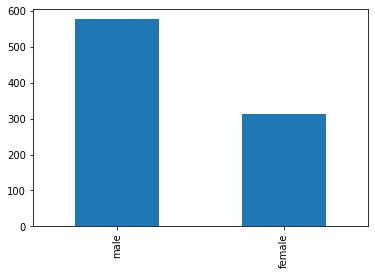

In [5]:
df.sex.value_counts().plot.bar() # matplotlib
                                 # can also use .plot(kind="bar") 

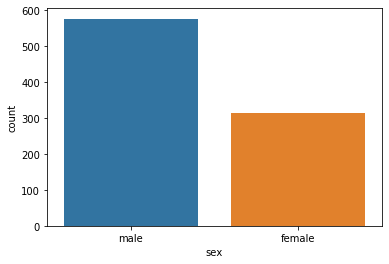

In [6]:
sns.countplot(x="sex",data=df) # seaborn

## Distplot

- continuous data

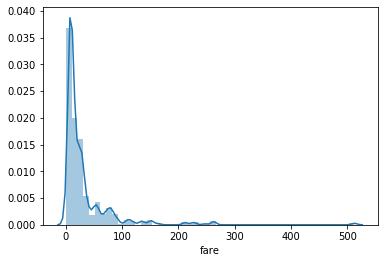

In [7]:
sns.distplot(df.fare) # probability distribution

## Boxplot
- continuous data

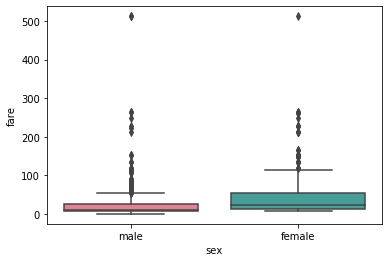

In [8]:
sns.boxplot(x="sex", y="fare", palette="husl", data=df)

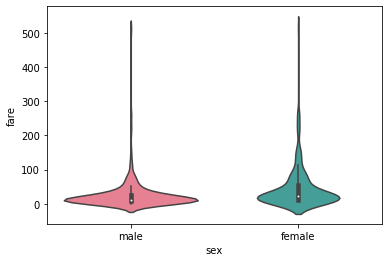

In [9]:
sns.violinplot(x="sex", y="fare", palette="husl", data=df) # also shows density

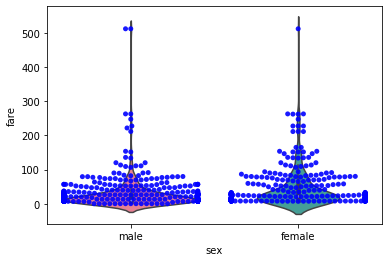

In [10]:
sns.violinplot(x="sex", y="fare", palette="husl", data=df)
sns.swarmplot(x="sex", y="fare", data=df, color="b", alpha=.9) # shows data points

# 3. Plot bivariate data

### Bar Graph

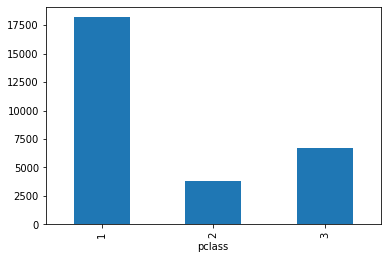

In [11]:
df.groupby('pclass').agg('sum')['fare'].plot.bar() # matplotlib

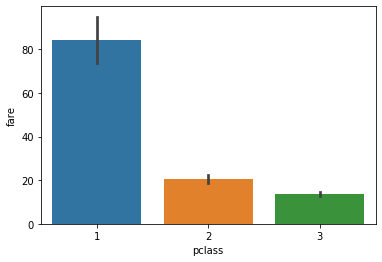

In [12]:
sns.barplot(x="pclass",y="fare",data=df)  # seaborn

## Scatter / Joint Plot

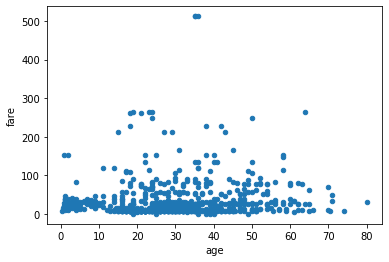

In [13]:
df.plot(kind="scatter",x="age",y="fare") # matplotlib

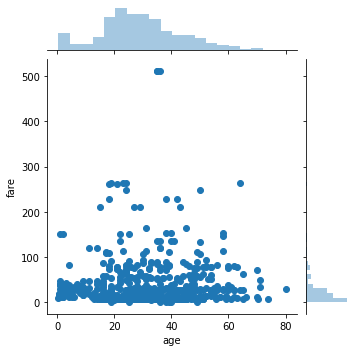

In [14]:
sns.jointplot(x="age", y="fare", data=df, size=5) # seaborn equivalent (with density)

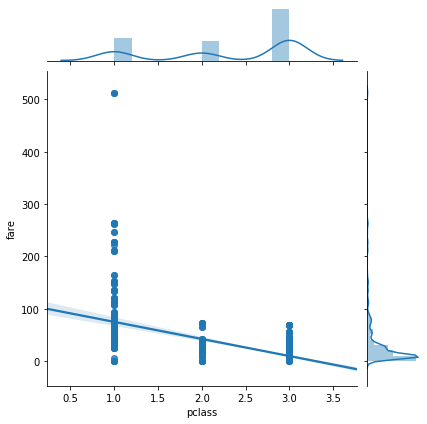

In [15]:
sns.jointplot("pclass", "fare", data=df, kind='reg') # bar plot, two variables

## Facet Grid

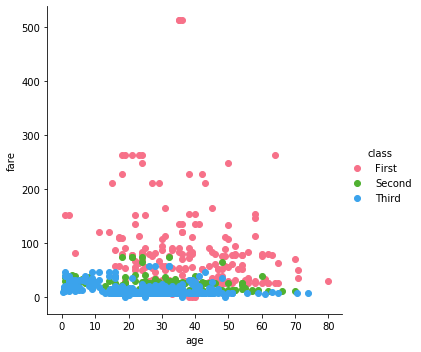

In [16]:
sns.FacetGrid(df, hue="class", palette="husl", size=5) \
   .map(plt.scatter, "age", "fare") \
   .add_legend()

# other palettes: hls, set2 (color blind safe), cubehelix (color blind safe)

## Kernal Density Estimate (KDE) Plot

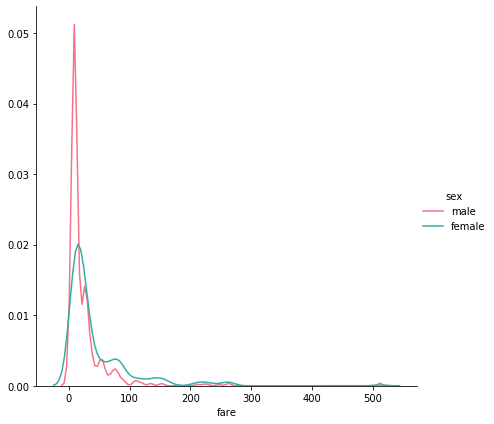

In [17]:
sns.FacetGrid(df, hue="sex", palette="husl", size=6) \
    .map(sns.kdeplot, "fare") \
    .add_legend()

## Pairplot

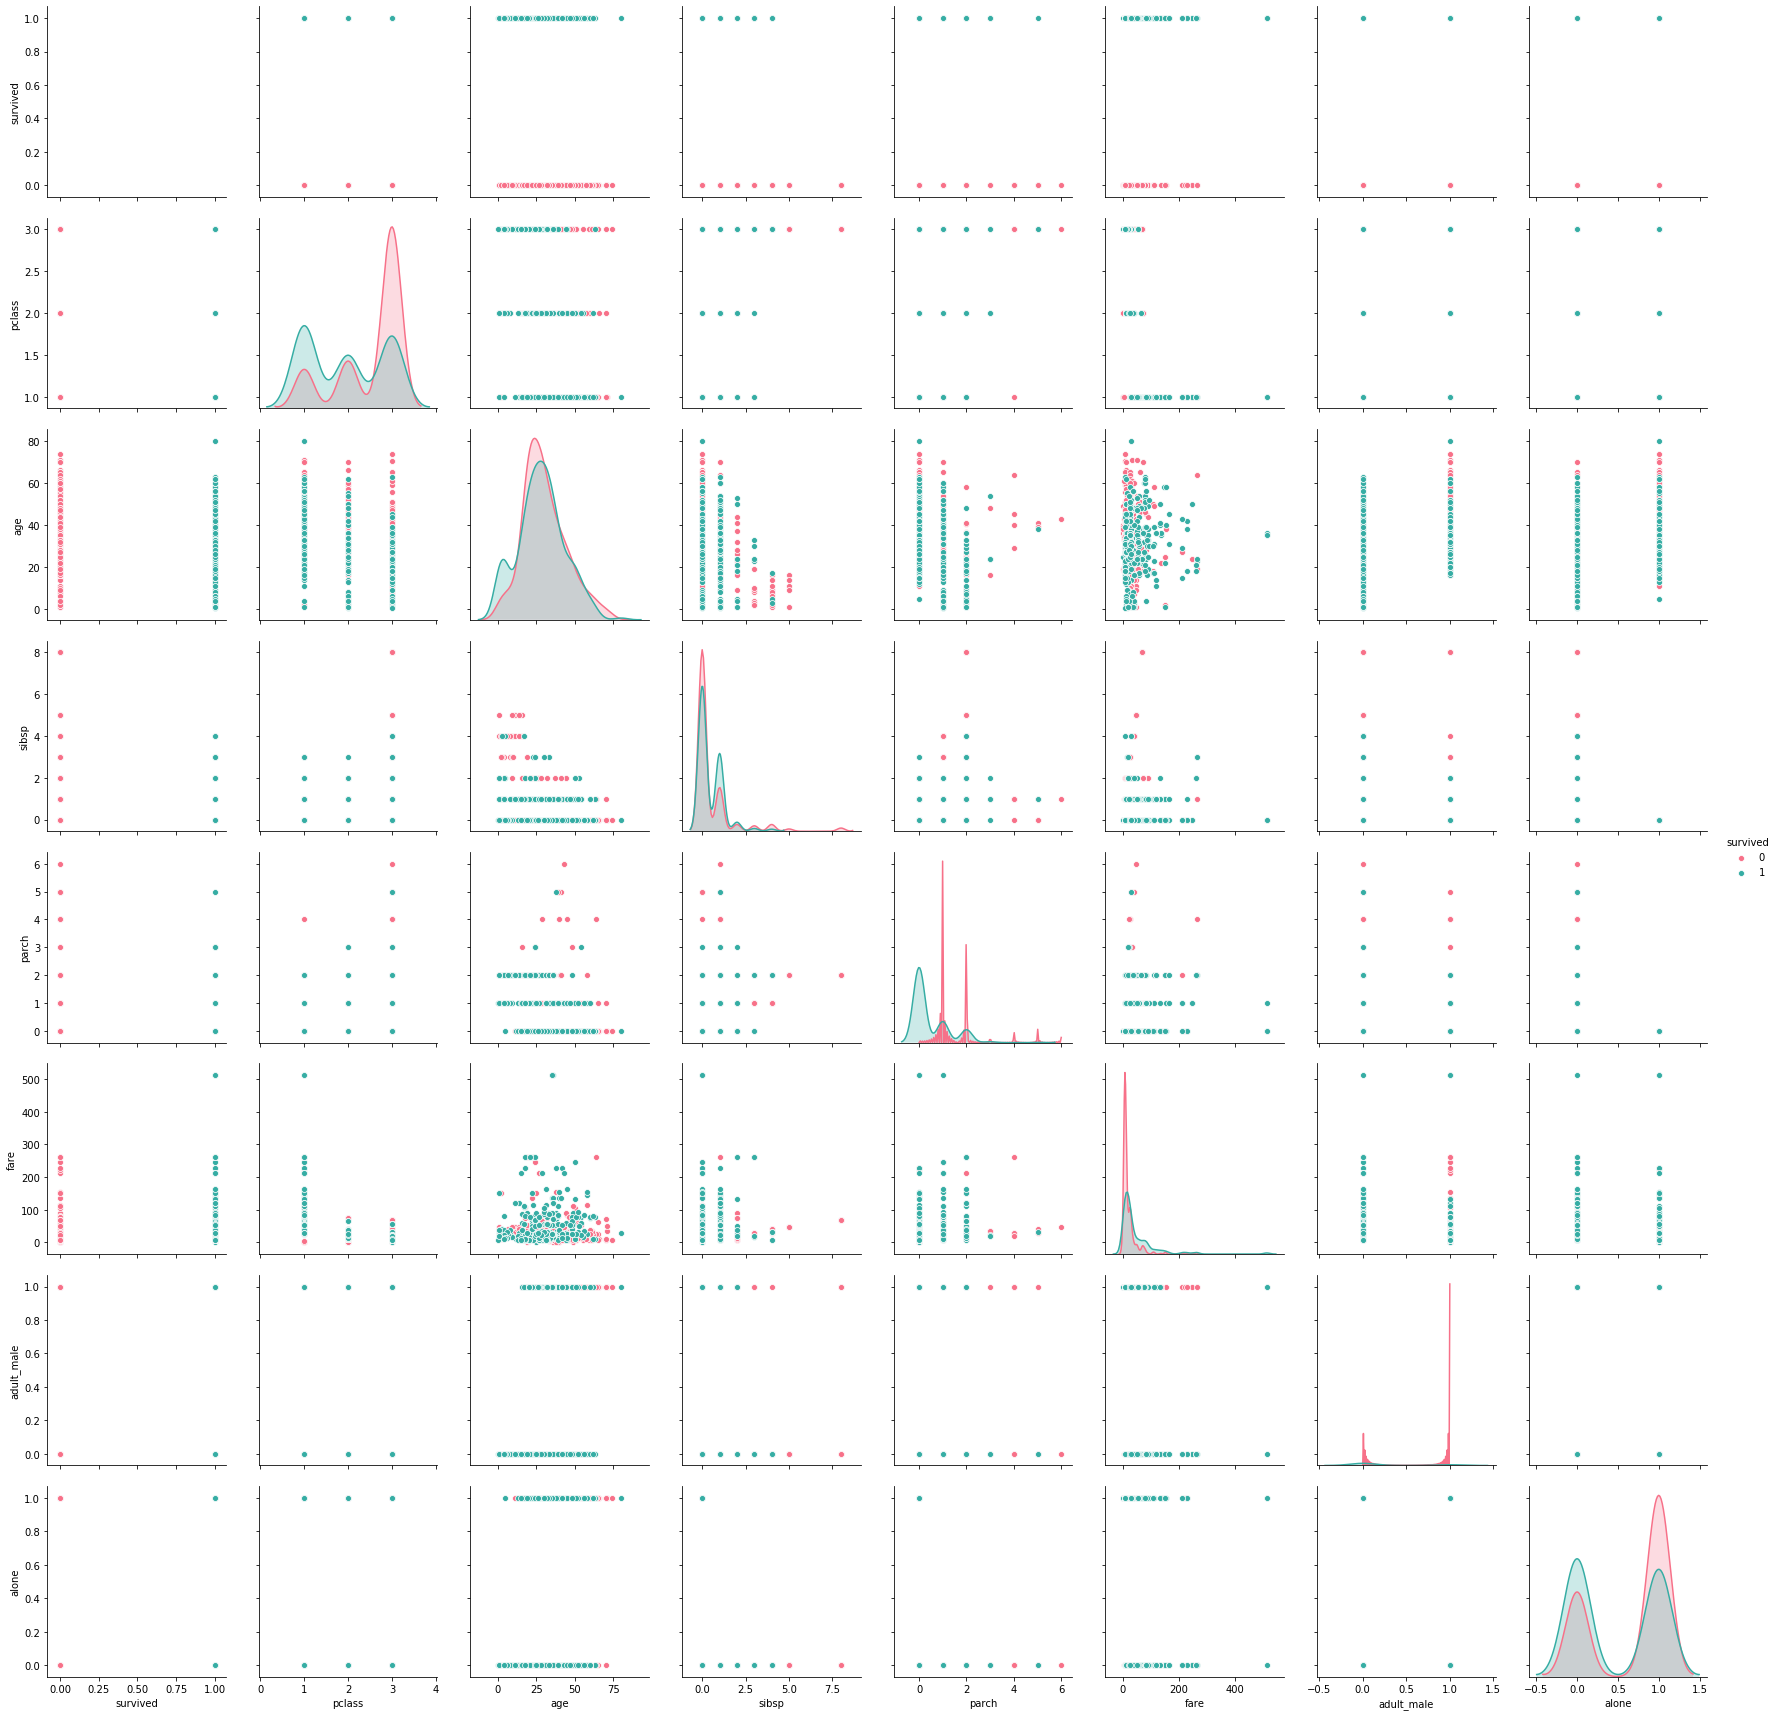

In [18]:
sns.pairplot(df, hue="survived", palette="husl", size=3)
# diag_kind="kde" or "hist"